# Bollinger Bands


## Yahoo finance
use yahoo_fin api to get data.


## 盈虧比
* 勝率和盈虧比
    * https://www.chengxulvtu.com/%E9%87%8F%E5%8C%96%E7%AD%96%E7%95%A5%E4%B8%AD%E7%9A%84%E8%83%9C%E7%8E%87%E5%92%8C%E7%9B%88%E4%BA%8F%E6%AF%94/
* 有了勝率和盈虧比，就可以計算收支平衡點(BEP: Break-even point)的公式線
    
## Reference:
https://www.tradingview.com/u/Taiwan_Bear/


In [1]:
cd D:\7.pythoncode\Quantitative-Trading\1119

D:\7.pythoncode\Quantitative-Trading\1119


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
# import other ipynb
import import_ipynb
from figure import show_bollinger, bollinger_bands, funding_changes, show_returns, draw_bubble_WL, draw_2D_WL, draw_PL_BEP_Figure
from transaction import transaction, init_rate, transactions
from profit_loss import profit_loss_analysis
from helper_func import get_stocks, get_one_stock

importing Jupyter notebook from figure.ipynb
importing Jupyter notebook from transaction.ipynb
importing Jupyter notebook from helper_func.ipynb
Warning - Certain functionality 
             requires requests_html, which is not installed.
             
             Install using: 
             pip install requests_html
             
             After installation, you may have to restart your Python session.
importing Jupyter notebook from profit_loss.ipynb


## 取股票

In [4]:
# Data Setup
IGS = "3293.two"
CSC = "2002.TW"
AT = "2458.TW"
ticker_list = ["tsla", "nflx", AT, CSC]

days = 20
N_std = 2

start_date = "10/01/2017"
end_date = "10/01/2020"

interval = "1d"

# fee tax or something else
rate = init_rate()

In [5]:
historical_datas = get_stocks(ticker_list, start_date, end_date, days, N_std)

## 交易策略
### 進場
1. 當前價格由下往上穿過20日均線

### 出場
* 浮動停損停利
    * 浮動停利點：停損點 * [2, 3, 4]倍
    * 浮動停損點：[0.01 ~ 0.09]
 

## CSC

In [6]:
CSC_df = historical_datas[CSC]
CSC_df

open       high        low      close   adjclose    volume  \
2017-10-02  24.450001  24.549999  24.400000  24.500000  22.137461   5422410   
2017-10-03  24.500000  24.549999  24.350000  24.450001  22.092283   8301039   
2017-10-05  24.350000  24.650000  24.350000  24.650000  22.272997   7638161   
2017-10-06  24.600000  24.650000  24.500000  24.600000  22.227819   6051573   
2017-10-11  24.350000  24.549999  24.299999  24.450001  22.092283  17936423   
...               ...        ...        ...        ...        ...       ...   
2020-09-24  20.350000  20.400000  20.000000  20.000000  20.000000  28253718   
2020-09-25  20.150000  20.200001  20.000000  20.150000  20.150000  11078662   
2020-09-28  20.200001  20.450001  20.200001  20.450001  20.450001   9284160   
2020-09-29  20.500000  20.750000  20.500000  20.600000  20.600000  21250797   
2020-09-30  20.700001  20.700001  20.450001  20.450001  20.450001  15561179   

             ticker   middle       std      lower      upper         B  \
2017-10-02  2002.TW      NaN       NaN        NaN        NaN       NaN   
2017-10-03  2002.TW      NaN       NaN        NaN        NaN       NaN   
2017-10-05  2002.TW      NaN       NaN        NaN        NaN       NaN   
2017-10-06  2002.TW      NaN       NaN        NaN        NaN       NaN   
2017-10-11  2002.TW      NaN       NaN        NaN        NaN       NaN   
...             ...      ...       ...        ...        ...       ...   
2020-09-24  2002.TW  20.5625  0.428853  19.704795  21.420205  0.172090   
2020-09-25  2002.TW  20.5700  0.419712  19.730576  21.409424  0.249828   
2020-09-28  2002.TW  20.5975  0.390504  19.816492  21.378508  0.405571   
2020-09-29  2002.TW  20.6275  0.364358  19.898784  21.356216  0.481131   
2020-09-30  2002.TW  20.6450  0.345612  19.953777  21.336224  0.358946   

             returns  
2017-10-02       NaN  
2017-10-03 -0.002041  
2017-10-05  0.008180  
2017-10-06 -0.002028  
2017-10-11 -0.006098  
...              ...  
2020-09-24 -0.026764  
2020-09-25  0.007500  
2020-09-28  0.014888  
2020-09-29  0.007335  
2020-09-30 -0.007282  

[730 rows x 13 columns]

In [7]:
CSC_df.index

DatetimeIndex(['2017-10-02', '2017-10-03', '2017-10-05', '2017-10-06',
               '2017-10-11', '2017-10-12', '2017-10-13', '2017-10-16',
               '2017-10-17', '2017-10-18',
               ...
               '2020-09-17', '2020-09-18', '2020-09-21', '2020-09-22',
               '2020-09-23', '2020-09-24', '2020-09-25', '2020-09-28',
               '2020-09-29', '2020-09-30'],
              dtype='datetime64[ns]', length=730, freq=None)

In [8]:
# 策略1
CSC_rec, CSC_iv, CSC_sig, CSC_earn = transaction(historical_datas[CSC], print_earn=True)

Total Earn: -1367.1969006667496


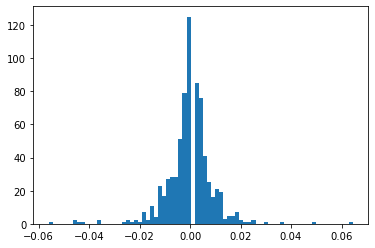

In [9]:
show_returns(CSC_df) # 回測

In [10]:
CSC_iv

{'shares': 0,
 'cost': 438874.5081600666,
 'buy_times': 18.0,
 'earn': 437507.31125939987,
 'sell_times': 18.0,
 'capital': 298632.80309933325,
 'per_trans': 1000,
 'init_capital': 300000}

In [11]:
CSC_rec

日期    動作           指標            總資金     持有股     交易每股金額  \
0  2017-11-03   BUY     cross_up  274263.376736  1000.0  24.700001   
1  2018-01-08  SELL  stop_profit  300397.332705     0.0  25.250000   
2  2018-01-25   BUY     cross_up  274260.139823  1000.0  25.100000   
3  2018-02-06  SELL    stop_loss  298751.390367     0.0  23.600000   
4  2018-04-09   BUY     cross_up  273916.051132  1000.0  23.799999   
5  2018-06-05  SELL  stop_profit  299104.206029     0.0  24.299999   
6  2018-06-20   BUY     cross_up  274268.866793  1000.0  23.799999   
7  2018-07-24  SELL  stop_profit  299905.033125     0.0  24.750000   
8  2018-08-14   BUY     cross_up  273918.053611  1000.0  24.950001   
9  2018-08-23  SELL  stop_profit  300300.904398     0.0  25.500000   
10 2018-09-18   BUY     cross_up  274263.854398  1000.0  25.000000   
11 2018-09-28  SELL  stop_profit  300646.705186     0.0  25.500000   
12 2018-11-05   BUY     cross_up  275260.581054  1000.0  24.350000   
13 2019-01-09  SELL  stop_profit  301095.864000     0.0  24.950001   
14 2019-02-20   BUY     cross_up  274858.528235  1000.0  25.200001   
15 2019-05-14  SELL    stop_loss  299847.568418     0.0  24.100000   
16 2019-06-06   BUY     cross_up  274461.444286  1000.0  24.350000   
17 2019-06-19  SELL  stop_profit  300296.727232     0.0  24.950001   
18 2019-07-03   BUY     cross_up  274560.103968  1000.0  24.700001   
19 2019-08-01  SELL    stop_loss  299250.469228     0.0  23.799999   
20 2019-09-02   BUY     cross_up  275015.983464  1000.0  23.200001   
21 2019-11-05  SELL  stop_profit  299706.348724     0.0  23.799999   
22 2019-11-26   BUY     cross_up  275121.365738  1000.0  23.549999   
23 2020-01-03  SELL  stop_profit  300110.405921     0.0  24.100000   
24 2020-01-10   BUY     cross_up  275224.994289  1000.0  23.850000   
25 2020-01-30  SELL    stop_loss  299118.896889     0.0  23.000000   
26 2020-02-19   BUY     cross_up  274583.984389  1000.0  23.500000   
27 2020-03-09  SELL    stop_loss  297880.539044     0.0  22.400000   
28 2020-04-27   BUY     cross_up  277351.326544  1000.0  19.500000   
29 2020-04-30  SELL  stop_profit  298258.491319     0.0  20.000000   
30 2020-05-05   BUY     cross_up  277428.852083  1000.0  19.799999   
31 2020-06-02  SELL  stop_profit  298734.248188     0.0  20.400000   
32 2020-06-16   BUY     cross_up  276903.183952  1000.0  20.799999   
33 2020-07-24  SELL    stop_loss  297959.685239     0.0  20.150000   
34 2020-08-26   BUY     cross_up  276829.617357  1000.0  20.100000   
35 2020-09-08  SELL  stop_profit  298632.803099     0.0  20.900000   

          實際買賣金額  Index  
0   25736.623264     21  
1   26133.955969     66  
2   26137.192882     79  
3   24491.250545     87  
4   24835.339236    121  
5   25188.154898    161  
6   24835.339236    171  
7   25636.166331    195  
8   25986.979514    210  
9   26382.850787    217  
10  26037.050000    235  
11  26382.850787    242  
12  25386.124132    267  
13  25835.282946    312  
14  26237.335764    335  
15  24989.040182    389  
16  25386.124132    406  
17  25835.282946    414  
18  25736.623264    424  
19  24690.365260    445  
20  24234.485764    466  
21  24690.365260    507  
22  24584.982986    522  
23  24989.040182    549  
24  24885.411632    554  
25  23893.902600    561  
26  24534.912500    575  
27  23296.554655    587  
28  20529.212500    620  
29  20907.164775    623  
30  20829.639236    625  
31  21305.396105    645  
32  21831.064236    655  
33  21056.501286    681  
34  21130.067882    704  
35  21803.185743    713

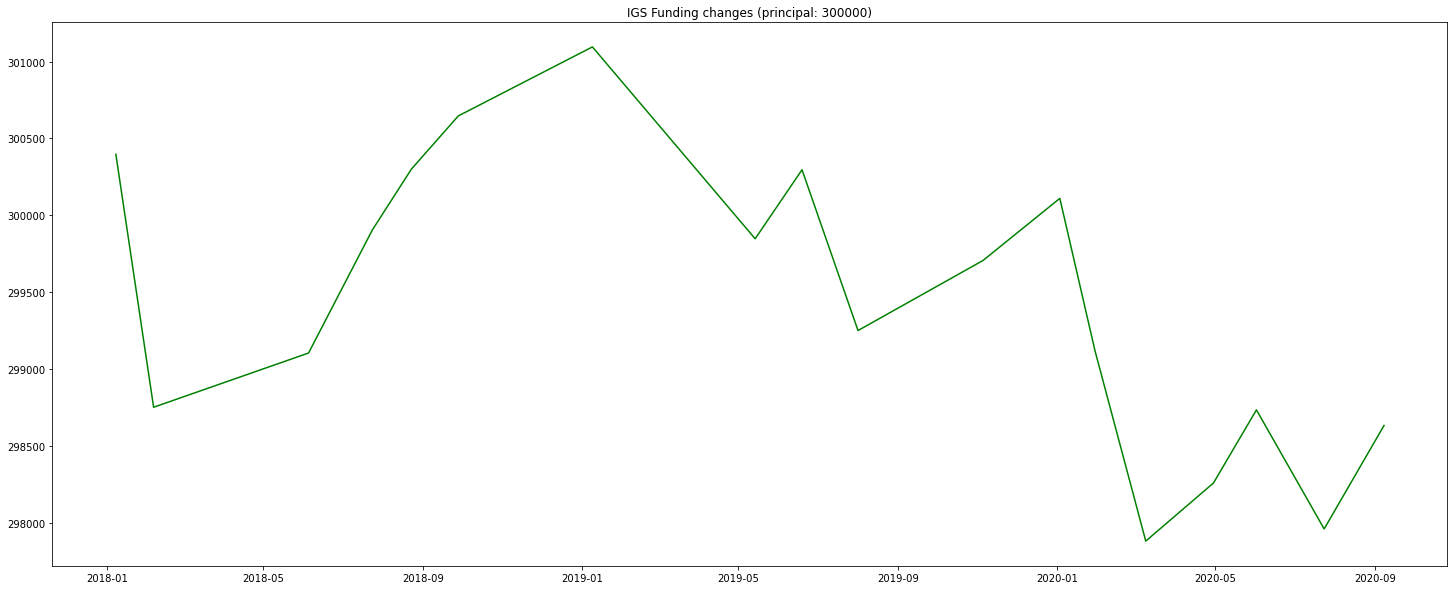

In [12]:
funding_changes(CSC_rec)

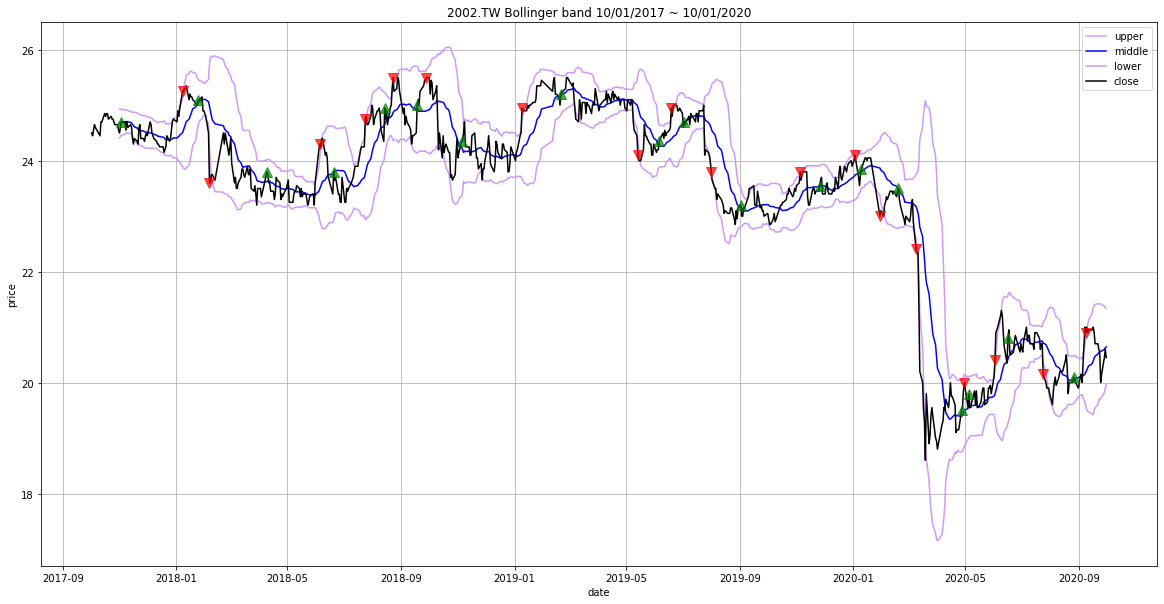

In [13]:
# 策略1
show_bollinger(CSC_df, CSC, start_date, end_date, CSC_sig)

In [14]:
bollinger_bands(historical_datas[CSC], CSC)

## Compare Companys

In [15]:
# return company dataframe, transaction record, investor final
def compareCompanys(ticker_list, raise_rate=0.02, drop_rate=0.03):
    results= []
    companys = get_stocks(ticker_list, start_date, end_date, days, N_std)
    
    for ticker, company in companys.items():
        rec, iv, sig, earn = transaction(company, print_earn=True)
        results.append([ticker, iv['earn']-iv['cost'], iv['earn'],
                            iv['cost'], iv['buy_times'], iv['sell_times']])

    return pd.DataFrame(results, columns=['公司', '獲利', '收入', '花費', '買(次數)', '賣(次數)'])

In [16]:
compareCompanys(ticker_list)

Total Earn: 35046.87742357608
Total Earn: 13107.12754369434
Total Earn: -3082.9875693120994
Total Earn: -1367.1969006667496


公司            獲利            收入            花費  買(次數)  賣(次數)
0     tsla  35046.877424  2.269192e+06  2.234145e+06   29.0   29.0
1     nflx  13107.127544  2.858706e+06  2.845599e+06   11.0   11.0
2  2458.TW  -3082.987569  2.917630e+06  2.920713e+06   36.0   36.0
3  2002.TW  -1367.196901  4.375073e+05  4.388745e+05   18.0   18.0

## 盈虧比

In [17]:
pl = profit_loss_analysis(CSC_rec, True)
pl

-------------------------

total win: 5577.7288482033255 （盈利金額）
total loss: -6944.925748869995 （虧損金額）

-------------------------

win times:  12
loss times:  6
win rate: 66.66%

-------------------------

profit loss ratio: 0.401%  （ |average win / average loss| 即盈虧比 ）

expected value: -0.06562090318911984 （ 期望值 ＝（盈虧比 x 勝率）–（1 - 勝率））

-------------------------


(0.4015686452163203, 0.6666666666666666, 0.7134862808276211)

## 分析停利停損 - 畫圖

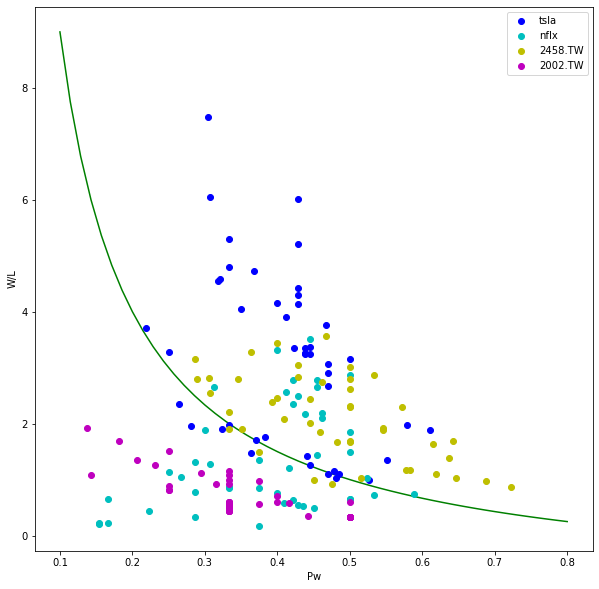

In [18]:
IGS = "3293.two"
CSC = "2002.TW"
AT = "2458.TW"
ticker_list = ["tsla", "nflx", AT, CSC]

# fee tax or something else
draw_2D_WL(ticker_list,[1,2,3,4,5])

D:\Anaconda\envs\nlu\lib\site-packages\matplotlib\collections.py:885: RuntimeWarning:

invalid value encountered in sqrt



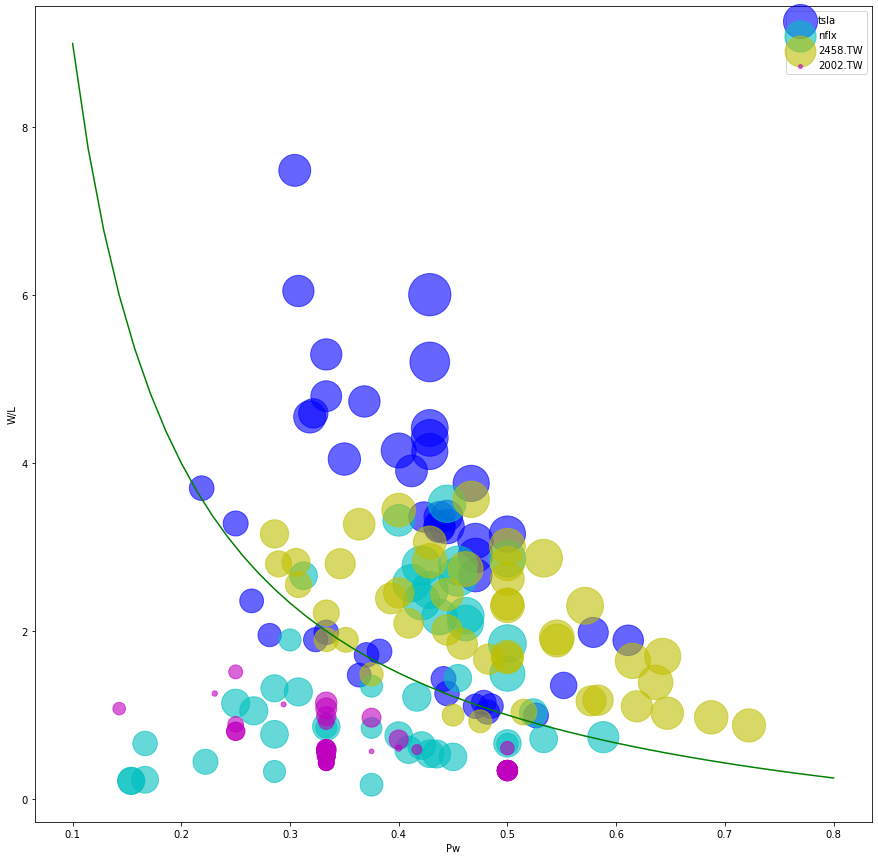

In [19]:
draw_bubble_WL(ticker_list,[1,2,3,4,5])

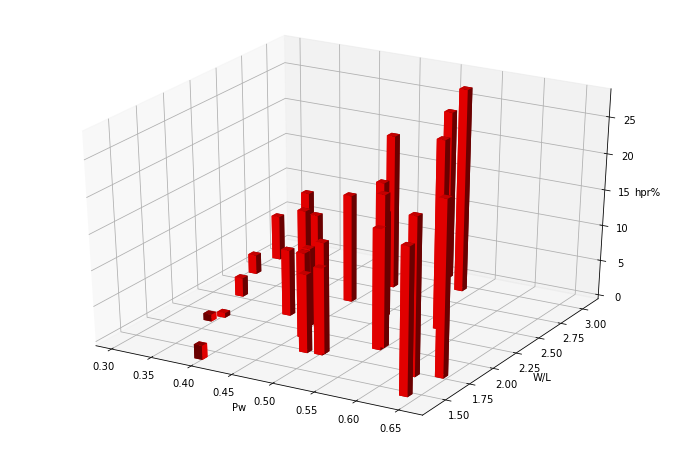

In [20]:
df = draw_PL_BEP_Figure(AT)

## 交易策略
### 進場：
    每個月最後一天價格 > 10個月 SMA
### 出場：
    每個月最後一天價格 > 10個月 SMA (售出並存至定存)

In [21]:
# transactions([IGS, 'tsla'], strategy=2, days=300)
rec, _, sig, total_earn = transactions(['2882.TW', '2330.TW', '2612.TW', '1402.TW', '1216.TW'], strategy=2, days=300, start_date='10/01/2010', end_date='10/01/2020')
total_earn

Init capital:1500000.0


{'2882.TW': 12719.767285301583,
 '2330.TW': 289867.83926250006,
 '2612.TW': -9950.852698707662,
 '1402.TW': -22272.802015853056,
 '1216.TW': 31052.224685338035,
 'total earn': 785670.5489466633}

In [22]:
rec['2330.TW']

日期    動作     指標     持有股  交易每股金額         實際買賣金額  Index
0 2012-01-31   BUY    buy  1000.0    78.5   79613.287500    327
1 2015-08-31  SELL   sell     0.0   129.0  129425.305750   1212
2 2015-11-30   BUY    buy  1000.0   139.0  140199.500000   1275
3 2018-10-31  SELL   sell     0.0   234.0  233961.129625   1993
4 2019-04-30   BUY    buy  1000.0   259.0  260370.500000   2109
5 2019-05-31  SELL   sell     0.0   235.5  235454.498537   2131
6 2019-07-31   BUY    buy  1000.0   259.5  260871.212500   2173
7 2020-09-30  SELL  clean     0.0     0.0  432081.405350   2458

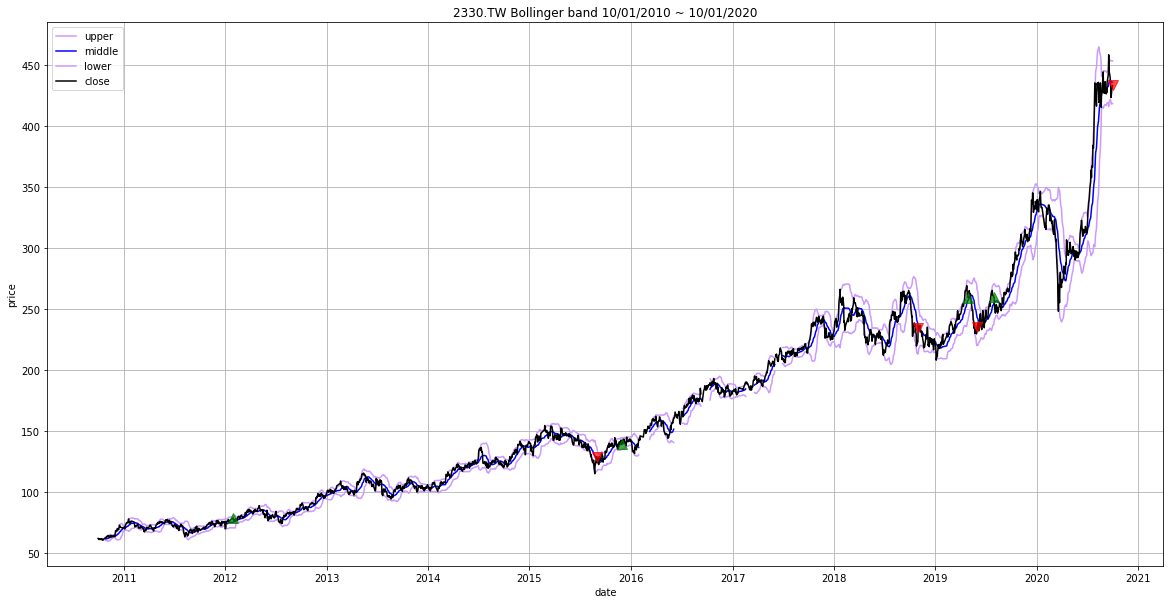

In [23]:
df = get_one_stock('2330.TW', start_date='10/01/2010', end_date='10/01/2020')
show_bollinger(df, '2330.TW', start_date='10/01/2010', end_date='10/01/2020', SIG=sig['2330.TW'])

In [24]:
_,_,_, total_earn = transactions(['2882.TW', '2330.TW', '2612.TW', '1402.TW', '1216.TW'], strategy=2, days=300, start_date='10/01/2019', end_date='10/01/2020')
total_earn

Init capital:1500000.0


{'2882.TW': 0.0,
 '2330.TW': 0.0,
 '2612.TW': 0.0,
 '1402.TW': 0.0,
 '1216.TW': 0.0,
 'total earn': 14250.0}